importing modules

In [1]:
from sklearn.datasets import  fetch_openml
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import  train_test_split,GridSearchCV
from pandas import  DataFrame
import matplotlib.pyplot as plt


- loading the data 
- taking only 500 samples for training
- showing first 5 images

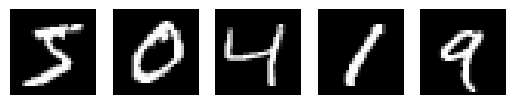

In [2]:
mnist = fetch_openml("mnist_784", version=1)
x = DataFrame(mnist.data)
y = DataFrame(mnist.target).values.ravel()
x = x.iloc[:500, :]
y = y[:500]
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x.loc[i].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

Spliting the data to 80% train and 20% test

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

creating a random forrest with grid search cv for hyper parameter tuning with 5 folds for k-fold cross validation and accuracy as scoring metric

In [4]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model=RandomForestClassifier()
grid=GridSearchCV(model,param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

printing params for the ideal model with it score

In [5]:
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.8675
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
